## Steps:
#### 1. Extract cifar dataset. Consists of images and corresponding labels or class_names along with each image.
#### 2. Apply PCA on it.
#### 3. Plot images before and after applying PCA 
#### 4. Plot the extracted eigen vectors
#### 5. Apply SVM or Naive Bayes and check accuracy

In [25]:
import cifar10
import matplotlib.pyplot as plt
from sklearn import datasets , metrics , svm , decomposition
import numpy as np

#### Open cifar10.py file side by side to see the documentation attached and hence to use fucntions correctly.

In [6]:
cifar10.data_path = "data/CIFAR-10/"

In [7]:
# Download (if not already) and extract data

cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [8]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
# It loads images , along with class numbers and one-hot encoded class labels 

images_train , class_train , labels_train = cifar10.load_training_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


In [10]:
images_train.shape

(50000, 32, 32, 3)

In [11]:
# Hence these are 50000 , 32X32 , RGB (for 3 value) images

In [14]:
print("shape - " , class_train.shape)
class_train[0:10]

shape -  (50000,)


array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3])

In [15]:
labels_train.shape

(50000, 10)

In [16]:
# Above are the labels (classes) in one hot encoded form
labels_train[0:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [17]:
# Similarly loading testing dataset

images_test , class_test , labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [41]:
print(images_test.shape)

(10000, 32, 32, 3)


In [18]:
print("Size of :")
print("Training set: " , len(images_train))
print("Testing set: " , len(images_test))

Size of :
Training set:  50000
Testing set:  10000


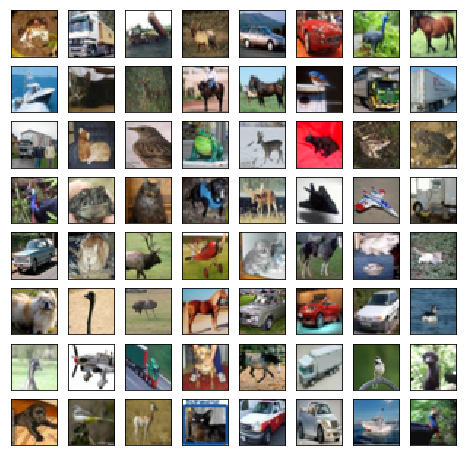

In [21]:
# plotting the images
fig = plt.figure( figsize = (8,8)) #Create a figure of size 8X8
for i in range( 64 ):
    ax = fig.add_subplot (8,8 , i+1 , xticks = [] , yticks = [])
    # Adding a subplot in each cell of 8X8 figure 
    # Parameters - fig_size , cell number , removing x axis and y axis labels
    ax.imshow(images_train[i] , cmap = plt.cm.bone)
plt.show()

In [42]:
# Flattening the image array to be given to pca
images_train_data = images_train.reshape(50000 , 32*32*3)
images_test_data = images_test.reshape(10000 , 32*32*3 )

#### Applying pca, so as to calculate number_of_components to be given so as to maintain a particular variance

In [44]:
pca = decomposition.PCA()
pca.fit(images_train_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
k = 0 
total = 0 
while total < 0.9:
    total = total + pca.explained_variance_ratio_[k]
    k = k+1
k

99

In [46]:
pca = decomposition.PCA(n_components = 99)
x_train_pca = pca.fit_transform(images_train_data)
x_test_pca = pca.transform(images_test_data)

In [47]:
print(x_train_pca.shape , x_test_pca.shape)

(50000, 99) (10000, 99)


In [48]:
svc = svm.SVC()
svc.fit( x_train_pca , class_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
class_pred = svc.predict(x_test_pca)
metrics.confusion_matrix( class_test , class_pred )

array([[626,  26,  58,  18,  23,  19,  21,  23, 134,  52],
       [ 27, 664,  18,  39,   6,  19,  13,  21,  58, 135],
       [ 75,  27, 422, 101, 126,  58, 104,  50,  23,  14],
       [ 27,  21,  80, 404,  57, 179, 118,  38,  23,  53],
       [ 45,  14, 153,  63, 450,  40, 130,  63,  25,  17],
       [ 23,  14,  67, 208,  65, 457,  71,  49,  21,  25],
       [ 14,  20,  79,  86,  91,  35, 630,  20,  10,  15],
       [ 33,  25,  46,  68,  73,  72,  33, 572,  15,  63],
       [ 85,  61,  15,  29,  19,  19,  12,  14, 690,  56],
       [ 40, 137,  10,  50,  11,  18,  19,  34,  62, 619]])

In [59]:
score = svc.score(x_test_pca , class_test)
print(score)

0.5534


In [54]:
print(metrics.classification_report(class_test, class_pred))

             precision    recall  f1-score   support

          0       0.63      0.63      0.63      1000
          1       0.66      0.66      0.66      1000
          2       0.45      0.42      0.43      1000
          3       0.38      0.40      0.39      1000
          4       0.49      0.45      0.47      1000
          5       0.50      0.46      0.48      1000
          6       0.55      0.63      0.59      1000
          7       0.65      0.57      0.61      1000
          8       0.65      0.69      0.67      1000
          9       0.59      0.62      0.60      1000

avg / total       0.55      0.55      0.55     10000



In [58]:
print(class_test[0:20])
print(class_pred[0:20])

[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]
[3 8 8 0 4 6 3 4 2 1 8 1 1 7 9 8 5 7 8 6]
